In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sys
import os

import neural_net
print(os.getcwd())
%pylab inline

/Users/Apple/Desktop/MIT/pml/PML-DNN-hw1-master/neural_net
Populating the interactive namespace from numpy and matplotlib


## Regression - homework

In [5]:
dropbox_path = '/Users/Apple/Dropbox (MIT)/MAS.S61/Homeworks/Homework1-NN/'
filename = 'parkinsons_supervised.csv'

In [6]:
# Set the hyperparameters
layer_sizes = [128,32]
batch_size = 25
learning_rate = .001
dropout_prob = 1.0
weight_penalty = 0.0
clip_gradients = False

In [7]:
reload(neural_net)
neural_net.reload_files()

In [8]:
net = neural_net.NeuralNetwork(dropbox_path + filename, 'homework', 
                               layer_sizes, batch_size, learning_rate, dropout_prob, 
                               weight_penalty, clip_gradients, model_type='regression')

Original data length was 5875
After dropping rows with nan in any label column, length is 5875
3581 rows in training data
1167 rows in validation data
1127 rows in testing data

Performing regression.
Input dimensions (number of features): 20
Number of classes/outputs: 2

Building computation graph...
Okay, making a neural net with the following structure:
[('20x128', '128'), ('128x32', '32'), ('32x2', '2')]


In [21]:
#find good hyperparameters for the base set

layer_size_cands = [[64, 32], [128, 64, 32], [32, 32, 32], [32, 16, 8]]
learning_rates = [0.01]
weight_penalties = [0.01]
dropouts = [0.9]





rmse_results = []
dict = {}
import time
start = time.time()
index = 0
for learning_rate in learning_rates:
    for weight_penalty in weight_penalties:
        for dropout_prob in dropouts:
            for i in range(0,5):
                clip_gradients = True
                print('this is iteration ' + str(i) + ' !!!!!')
                net = neural_net.NeuralNetwork(dropbox_path + filename, 'homework', 
                                           layer_size_cands[i], batch_size, learning_rate, dropout_prob, 
                                           weight_penalty, clip_gradients, model_type='regression')
                net.train(num_steps=10, output_every_nth=45000)
                dict[(str(layer_size[0]) + "x" + str(layer_size[1]), learning_rate, weight_penalty, dropout_prob, i)] = net.test_on_validation()
                    
end = time.time()

this is iteration 0 !!!!!
Original data length was 5875
After dropping rows with nan in any label column, length is 5875
3581 rows in training data
1167 rows in validation data
1127 rows in testing data

Performing regression.
Input dimensions (number of features): 20
Number of classes/outputs: 2

Building computation graph...
Okay, making a neural net with the following structure:
[('20x64', '64'), ('64x32', '32'), ('32x2', '2')]
Training iteration 0
	 Training RMSE 29.2943
	 Validation RMSE 27.267
	 Loss 30.6476
Final RMSE on validation data is: 24.3829
this is iteration 1 !!!!!
Original data length was 5875
After dropping rows with nan in any label column, length is 5875
3581 rows in training data
1167 rows in validation data
1127 rows in testing data

Performing regression.
Input dimensions (number of features): 20
Number of classes/outputs: 2

Building computation graph...
Okay, making a neural net with the following structure:
[('20x64', '64'), ('64x32', '32'), ('32x2', '2')]
Tra

199.583539009


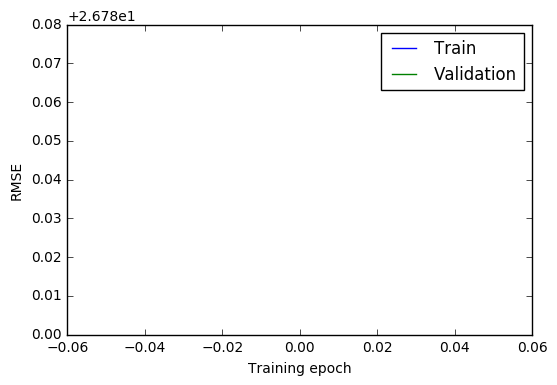

In [22]:
print end-start
net.plot_training_progress()

### debugging neural network using session.run

In [14]:
X, Y = net.data_loader.get_train_batch(10)
feed_dict = {net.tf_X: X,
             net.tf_Y: Y,
             net.tf_dropout_prob: 1.0}
print "X", np.shape(X), "Y", np.shape(Y)

X (10, 20) Y (10, 2)


In [19]:
print net.session.run([net.tf_X,net.tf_Y, net.logits], feed_dict=feed_dict)
#print "X", np.shape(tf_X), "Y", np.shape(tf_Y), "logits", np.shape(logits)

[array([[ 0.35033551, -1.78116202, -0.68470937, -1.40052152, -0.30320659,
        -0.1525038 , -0.25575474, -0.20323569, -0.25678062,  0.96460992,
         0.52912575,  0.97140121,  1.18462873,  0.82155502,  0.97114718,
        -0.20225847, -0.40879247,  1.4391408 ,  0.14954013, -0.16320474],
       [-0.62218499, -0.76638234,  1.46047366,  0.49315697, -0.65916598,
        -0.88036144, -0.54216307, -0.54065609, -0.54115933, -0.91260463,
        -0.95570928, -0.86152756, -0.82540822, -0.99184608, -0.86126816,
        -0.48749965,  1.05310428, -2.19696879,  0.07246424, -1.14588571],
       [ 0.4313789 , -0.87913561,  1.46047366, -1.33126593, -0.18627307,
        -0.4621276 , -0.04247193, -0.14307547, -0.0434966 ,  0.47931957,
         0.38813251,  0.52619565,  0.54269242,  0.58743757,  0.52594227,
        -0.46723726,  0.82877713, -1.87455714,  1.49147642, -0.31518951],
       [-0.70322841,  0.92491704,  1.46047366, -0.54672247, -0.43217739,
        -0.71460325, -0.29841128, -0.35755974, 

In [18]:
# To see the tensorflow model you've built in tensorboard, run the following
journalist = tf.summary.FileWriter(net.checkpoint_dir, graph=net.session.graph)
journalist.flush()

# Now enter the following command at the command line
# > tensorboard --logdir 'saved_models'
# (you may need to replace 'saved_models' with the path to the actual 
# net.checkpoint_dir you are using)